<a href="https://colab.research.google.com/github/akaicomet/NJOITOpenDataCenter-Pension-Record/blob/master/NJOITOpenDataCenter_Pension_Record_ModelEaluating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install tqdm
!pip install scikit-learn
!pip install sodapy
!pip install matplotlib
!pip install hyperopt
!pip install bayesian-optimization
!pip install tbvaccine 
!pip install MulticoreTSNE
!pip install -U -q PyDrive

    100% |████████████████████████████████| 61kB 4.8MB/s 
    100% |████████████████████████████████| 829kB 12.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


  Stored in directory: /root/.cache/pip/wheels/4b/60/a2/6eec4adc73341c1a2a653022b99ff8e1cb090684dba83be683
Successfully built bayesian-optimization
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE
    100% |████████████████████████████████| 993kB 20.2MB/s 


#1. Copy python files from  GItHub repository to local

In [2]:
!git clone https://github.com/akaicomet/NJOITOpenDataCenter.git
!git clone https://github.com/akaicomet/akaicomet_Utility.git
!git clone https://github.com/akaicomet/akaicomet_Chart.git
!git clone https://github.com/akaicomet/akaicomet_ML.git

Cloning into 'NJOITOpenDataCenter'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 124 (delta 72), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (124/124), 11.09 MiB | 8.00 MiB/s, done.
Resolving deltas: 100% (72/72), done.
Cloning into 'akaicomet_Utility'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
Cloning into 'akaicomet_Chart'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 73 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
Cloning into 'akaicomet_ML'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
r

#2. Run .py files in local

In [0]:
%run -i /content/akaicomet_Utility/ErrorHandling.py

%run -i /content/NJOITOpenDataCenter/YourMoneyActivePensionMembers.py 
%run -i /content/NJOITOpenDataCenter/YourMoneyRetiredPensionMembers.py
%run -i /content/NJOITOpenDataCenter/YourMoneyPensionMembersMerge.py

%run -i /content/akaicomet_Chart/X-Ray_Scan.py
%run -i /content/akaicomet_Chart/akaicomet_Chart.py

%run -i /content/akaicomet_ML/ML_Init.py
%run -i /content/akaicomet_ML/ML_Auto.py
%run -i /content/akaicomet_ML/AutoFeatureEngineering.py


#3. Import libraries

In [0]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import random
from sodapy import Socrata
#from pandas.plotting import scatter_matrix
#from datetime import datetime
import seaborn as sb
from tqdm import tqdm
import warnings
from textwrap import wrap

#4. YourMoney and the NJOIT Open Data Center 
##4.1 YourMoney Active Pension Members API

**Pension member data load from NJOIT** 

In [5]:
client = Socrata("data.nj.gov", None)
results = client.get("45bd-gwii", limit=100000000)#100000000

**Data Cleansing and Preparation for YourMoney Active Pension Members data**

In [0]:
ActivePension_df = ActivePensionDataWrangler(results)

##4.2 YourMoney Retired Pension Members API
**Pension payment member data load from NJOIT**

In [0]:
results = client.get("8up4-62p6",   limit=100000000)

**Data Cleansing and Preparation for YourMoney Retired Pension data**

In [0]:
RetiredPension_df_grped = RetiredPensionMembersDataWrangler(results)

**Merge YourMoney Active Pension Members data and YourMoney Retired Pension data**

In [0]:
ActivePension_df = PensionMembersMerge(ActivePension_df,RetiredPension_df_grped)
del results

# 5 Recheck  Correlation Variable Validation:

In [10]:
#x_cols2 = ['_20_year_status',	'all_employers_salary_amt',		'employer_freq_pensioned', 'total_months_qty',	'location_freq_pensioned',		'current_employer_salary_rollingamt', 	'service_months_qty',	'pension_freq_pensioned', 'pension_fund_name_enc', 'pension_group_name_enc' ]
x_cols2 = ['_20_year_status','all_employers_salary_amt','employer_freq_pensioned','total_months_qty','location_freq_pensioned','service_months_qty','pension_freq_pensioned','pension_fund_name_enc','pension_group_name_enc' ]
ActivePension_df[x_cols2].corr()

,_20_year_status,all_employers_salary_amt,employer_freq_pensioned,total_months_qty,location_freq_pensioned,service_months_qty,pension_freq_pensioned,pension_fund_name_enc,pension_group_name_enc
_20_year_status,1.000000,0.296121,-0.075399,0.843661,0.082801,-0.001872,0.090456,-0.234559,-0.111928
all_employers_salary_amt,0.296121,1.000000,-0.067666,0.398653,-0.029870,-0.025237,-0.440353,0.207960,0.095488
employer_freq_pensioned,-0.075399,-0.067666,1.000000,-0.066242,0.191595,0.025102,0.042643,0.097229,-0.041309
total_months_qty,0.843661,0.398653,-0.066242,1.000000,0.065996,0.001912,0.044909,-0.182735,-0.119353
location_freq_pensioned,0.082801,-0.029870,0.191595,0.065996,1.000000,0.055229,0.306982,0.048206,-0.062512
service_months_qty,-0.001872,-0.025237,0.025102,0.001912,0.055229,1.000000,0.076532,0.056533,-0.033170
pension_freq_pensioned,0.090456,-0.440353,0.042643,0.044909,0.306982,0.076532,1.000000,-0.305136,-0.302495
pension_fund_name_enc,-0.234559,0.207960,0.097229,-0.182735,0.048206,0.056533,-0.305136,1.000000,0.180077
pension_group_name_enc,-0.111928,0.095488,-0.041309,-0.119353,-0.062512,-0.033170,-0.302495,0.180077,1.000000


#6 Initial Basic Model Selected 

In [11]:
y_train = ActivePension_df['IsPensionPaid']
X_train = ActivePension_df[x_cols2]

X_train = X_train.astype(float)

clfs = dict()
clfs_score = dict()

scaling_def = {'QuantileTransformer_n':QuantileTransformer(output_distribution='normal')}
redemensioning_def = {'PCA': PCA(n_components=0.99, svd_solver='full')}

for data in map(lambda x:Redimensioning2(x[1],x[0],redemensioning_def), scaling3(X_train,scaling_def)):
  for x in data:
    MLModelBuilding('RandomForestClassifier', x[1], x[0], y_train, 0.3, clfs, [0.1, 1],clfs_score)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.9910993621613756
Test score: 0.957559981892259
Test2 score: 0.9805907650520598
RandomForestClassifier|PCA QuantileTransformer_n|



In [12]:
clfs['RandomForestClassifier|PCA QuantileTransformer_n|']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#7 Forecast Model Review

In [0]:
scaling_def = {'QuantileTransformer_n':QuantileTransformer(output_distribution='normal')}
redemensioning_def = {'PCA': PCA(n_components=0.99, svd_solver='full')}

sample = ActivePension_df[x_cols2 + ['IsPensionPaid']].sample(n=50000, random_state=5)

for data in map(lambda x:Redimensioning2(x[1],x[0],redemensioning_def), scaling3(sample[x_cols2],scaling_def)):
  for x in data:
    clf_pred = clfs['RandomForestClassifier|PCA QuantileTransformer_n|'].predict(x[0])

In [0]:
Predict_df = sample
Predict_df['Predict'] = clf_pred

In [61]:
Predict_df[Predict_df['IsPensionPaid'] != Predict_df['Predict']].head(10)

,_20_year_status,all_employers_salary_amt,employer_freq_pensioned,total_months_qty,location_freq_pensioned,service_months_qty,pension_freq_pensioned,pension_fund_name_enc,pension_group_name_enc,IsPensionPaid,Predict
29077,1,63821.0,40.0,440,1507,8,17486,0.456744,0.464307,1.0,0.0
19077,1,76986.0,25.0,398,6124,2,17486,0.456744,0.464307,1.0,0.0
46793,1,56020.0,144.0,401,1018,5,17486,0.456744,0.464307,1.0,0.0
32142,1,91620.0,38.0,405,1781,9,5562,0.393575,0.493800,1.0,0.0
23183,1,101825.0,22.0,401,6124,5,17486,0.456744,0.464307,1.0,0.0
11815,1,94778.0,54.0,408,1769,0,5562,0.393575,0.493800,1.0,0.0
57350,1,83660.0,215.0,420,6124,0,17486,0.456744,0.464307,1.0,0.0
35463,1,61786.0,104.0,463,1933,7,17486,0.456744,0.464307,1.0,0.0
3495,1,98100.0,15.0,352,1769,4,5562,0.393575,0.493800,1.0,0.0
18035,1,126034.0,35.0,446,1351,2,5562,0.393575,0.493800,1.0,0.0


In [0]:
df_describe = pd.merge(Predict_df[Predict_df['IsPensionPaid'] != Predict_df['Predict']].groupby('Predict').describe().T,Predict_df[Predict_df['IsPensionPaid'] == Predict_df['Predict']].groupby('IsPensionPaid').describe().T, left_index=True, right_index=True)

In [87]:
df_describe

0.0_x          1.0_x          0.0_y  \
_20_year_status          25%         1.000000       1.000000       1.000000   
                         50%         1.000000       1.000000       1.000000   
                         75%         1.000000       1.000000       1.000000   
                         count    3014.000000     137.000000   26005.000000   
                         max         1.000000       1.000000       1.000000   
                         mean        1.000000       1.000000       1.000000   
                         min         1.000000       1.000000       1.000000   
                         std         0.000000       0.000000       0.000000   
all_employers_salary_amt 25%     60962.750000   58038.000000   63793.000000   
                         50%     83332.000000   73519.000000   86099.000000   
                         75%    103743.500000  106714.000000  104030.000000   
                         count    3014.000000     137.000000   26005.000000   
                         max    245247.000000  236617.000000  363091.000000   
                         mean    85280.537492   84840.875912   86909.007037   
                         min      3000.000000    3120.000000     275.000000   
                         std     34311.029387   44731.229848   34090.450546   
employer_freq_pensioned  25%        17.000000      36.000000      14.000000   
                         50%        40.000000      81.000000      33.000000   
                         75%       104.000000     215.000000      82.000000   
                         count    3014.000000     137.000000   26005.000000   
                         max       573.000000     573.000000     573.000000   
                         mean       90.866954     133.868613      75.423842   
                         min         1.000000       2.000000       0.000000   
                         std       119.851204     131.116406     110.051173   
location_freq_pensioned  25%      1193.000000    1769.000000    1193.000000   
                         50%      1769.000000    2470.000000    1769.000000   
                         75%      6124.000000    6124.000000    6124.000000   
                         count    3014.000000     137.000000   26005.000000   
                         max      6124.000000    6124.000000    6124.000000   
                         mean     2698.156271    3660.729927    2753.768198   
...                                       ...            ...            ...   
pension_fund_name_enc    75%         0.456744       0.456744       0.456744   
                         count    3014.000000     137.000000   26005.000000   
                         max         0.911854       0.911854       0.911854   
                         mean        0.470512       0.519768       0.453550   
                         min         0.393575       0.393575       0.393575   
                         std         0.094803       0.139973       0.076212   
pension_group_name_enc   25%         0.464307       0.464307       0.464307   
                         50%         0.464307       0.464307       0.464307   
                         75%         0.493800       0.464307       0.493800   
                         count    3014.000000     137.000000   26005.000000   
                         max         0.911854       0.911854       0.911854   
                         mean        0.468308       0.452322       0.470313   
                         min         0.000000       0.000000       0.000000   
                         std         0.049429       0.165956       0.049600   
service_months_qty       25%         2.000000       4.000000       3.000000   
                         50%         5.000000       7.000000       5.000000   
                         75%         8.000000      10.000000       8.000000   
                         count    3014.000000     137.000000   26005.000000   
                         max        11.000000      11.000000      11.000000   
           

In [86]:
df_describe.loc['all_employers_salary_amt','mean']

0.0_x    85280.537492
1.0_x    84840.875912
0.0_y    86909.007037
1.0_y    65574.196795
Name: (all_employers_salary_amt, mean), dtype: float64

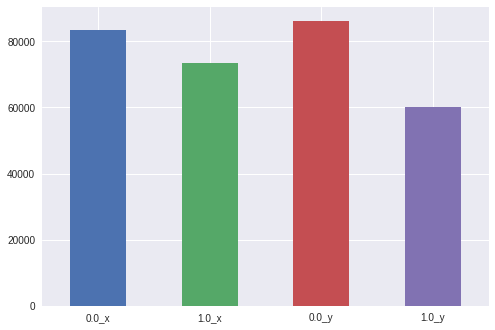

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
df_describe.loc['all_employers_salary_amt',('50%')].plot(ax=axes[0, 0], legend=False, kind='bar')